# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/zr/sz_jy6rd3kv1mgdfnyq1_q6w0000gn/T/ipykernel_41440/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [231]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [232]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
print(df.columns)
df.head()

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [10]:
len(df["YEAR"].unique()) # 1986-2019

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [17]:
michigan_avg = df["AVG_MATH_8_SCORE"][df["STATE"] == "MICHIGAN"].mean()
ohio_avg = df["AVG_MATH_8_SCORE"][df["STATE"] == "OHIO"].mean()
print("Michigan average:", michigan_avg)
print("Ohio average:", ohio_avg)

Michigan average: 276.1666666666667
Ohio average: 282.25


Find the average for your chosen test across all states in 2019

In [19]:
michigan_avg = df["AVG_MATH_8_SCORE"][df["PRIMARY_KEY"] == "2019_MICHIGAN"].mean()
ohio_avg = df["AVG_MATH_8_SCORE"][df["PRIMARY_KEY"] == "2019_OHIO"].mean()
print("Michigan average 2019:", michigan_avg)
print("Ohio average 2019:", ohio_avg)

Michigan average 2019: 280.0
Ohio average 2019: 286.0


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [21]:
states = df.groupby("STATE")
states["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [233]:
df["AVG_MATH_8_SCORE"].isna().sum() # 1113 out of 1715 are NaN


# We can fill NaNs with medians from each state (since the distribution is likely left skewed like in the tutorial)
# How much does the median typically vary from a state's test scores?
states = df.groupby("STATE")
state_medians = states["AVG_MATH_8_SCORE"].median()
state_mins = states["AVG_MATH_8_SCORE"].min()
state_maxes = states["AVG_MATH_8_SCORE"].max()
print((state_medians - state_mins).max()) # Below median by 24 points at most, 1 at least
print((state_maxes - state_medians).max()) # Above median by 14 points at most, 1 at least
print((state_medians - states["AVG_MATH_8_SCORE"].quantile(0.25))) # 25th-75th percentile is right around the median
# I think that we can use the median to fill NaNs

# Fill NaNs with median for each state
# Pretty much copied this from stackoverflow
df['AVG_MATH_8_SCORE'] = df['AVG_MATH_8_SCORE'].fillna(df.groupby('STATE')['AVG_MATH_8_SCORE'].transform('median'))

# New columns for our analysis
# Problem: any row where ENROLL_ALL is NaN also has ENROLL_ALL_EST as NaN, so we can't use it to fill in values
# There are no good estimators for enrollment, so we're just going to drop NaN rows
df[df.ENROLL_ALL.isna()]["ENROLL_ALL_EST"].notna().sum() # Prints 0
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df.dropna(subset=['INSTRUCTION_EXPENDITURE_PER_STUDENT','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'], inplace=True)
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].isna().sum() # is 0

32.0
18.0
STATE
ALABAMA                  4.50
ALASKA                   1.00
ARIZONA                  6.00
ARKANSAS                10.25
CALIFORNIA               4.50
COLORADO                 4.00
CONNECTICUT              3.00
DELAWARE                 3.00
DISTRICT_OF_COLUMBIA    10.00
DODEA                    2.50
FLORIDA                  4.50
GEORGIA                  7.75
HAWAII                   6.50
IDAHO                    4.75
ILLINOIS                 4.50
INDIANA                  4.00
IOWA                     0.50
KANSAS                   0.50
KENTUCKY                 5.00
LOUISIANA                3.75
MAINE                    2.50
MARYLAND                 4.00
MASSACHUSETTS            7.50
MICHIGAN                 0.75
MINNESOTA                2.25
MISSISSIPPI              3.50
MISSOURI                 3.50
MONTANA                  0.50
NATIONAL                 8.00
NEBRASKA                 2.50
NEVADA                   3.75
NEW_HAMPSHIRE            2.50
NEW_JERSEY              

0

Feature engineering justification: I want to measure how spending per student affects Grade 8 Math scores. I filled NaN math score values with the average for the state, since the average typically didn't vary much from the year-to-year score. As mentioned in my code comments, there is not a good way to estimate enrollment, so I dropped all rows where ENROLL_ALL, INSTRUCTION_EXPENDITURE, or SUPPORT_SERVICES_EXPENDITURE was NaN.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

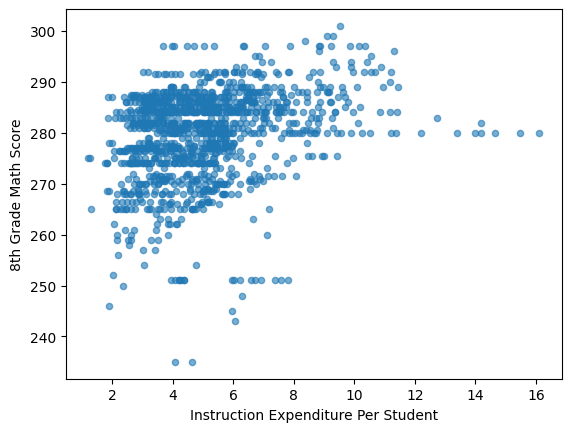

In [234]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

There seems to be a moderately linear relationship between instructor expenditure per student and 8th grade math score. However, there are some outliers where expenditure is high but scores are still low. The plot appears to level off for higher expenditure values, indicating that there may be diminishing returns after a certain amount of expenditures.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

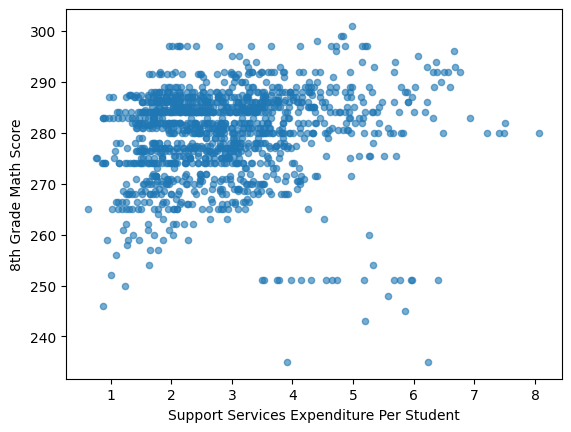

In [235]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Support Services Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

There seems to be a moderately linear relationship between support services expenditure per student and 8th grade math score. The relationship between support services expenditure and test scores does not appear to be as strong as the relationship between instruction expenditure and test scores. However, there are some outliers where expenditure is high but scores are still low. The plot appears to level off for higher expenditure values, indicating that there may be diminishing returns after a certain point of expenditures.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [107]:
from sklearn.model_selection import train_test_split

In [239]:
# Double-check there are no NaNs
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].isna().sum() # is 0
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'].isna().sum() # is 0
df['AVG_MATH_8_SCORE'].isna().sum() # is 0

X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']]
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [223]:
# Using Ridge regression, which imposes a penalty on the size of coefficients
from sklearn.linear_model import Ridge

In [224]:
# create your model here
model = linear_model.Ridge(alpha=0.5)

In [241]:
model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [242]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [243]:
# You can see the intercepts and coefficients the model generates
print(model.intercept_)
print(model.coef_)
# R squared
print(model.score(X_test, y_test)) # Yikes
# Mean absolute error
print(np.mean(np.abs(model.predict(X_test)-y_test)))
# RMSE
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

274.26547855268683
[ 3.54602237 -4.32153619]
0.1478487102070578
5.790901523848037
7.2116127620097865


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

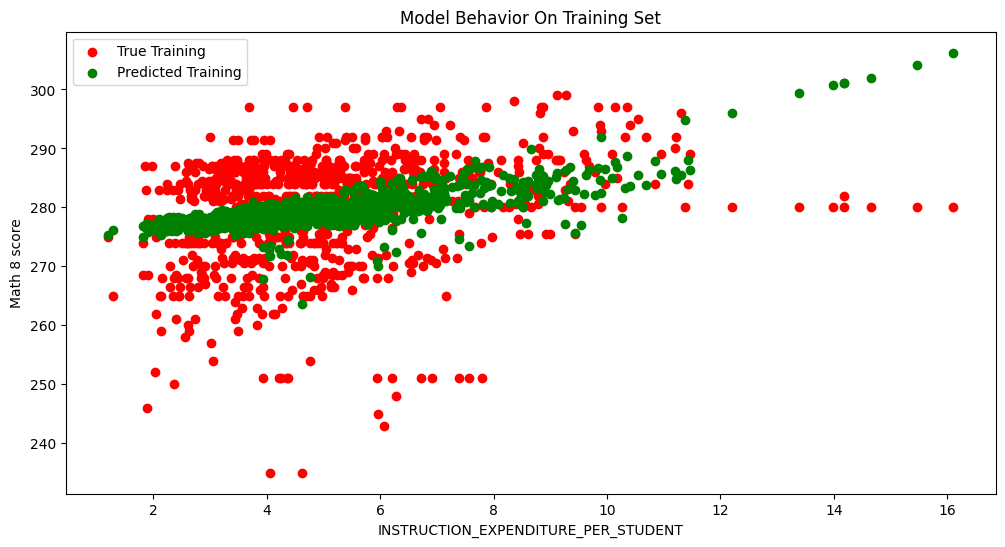

In [244]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

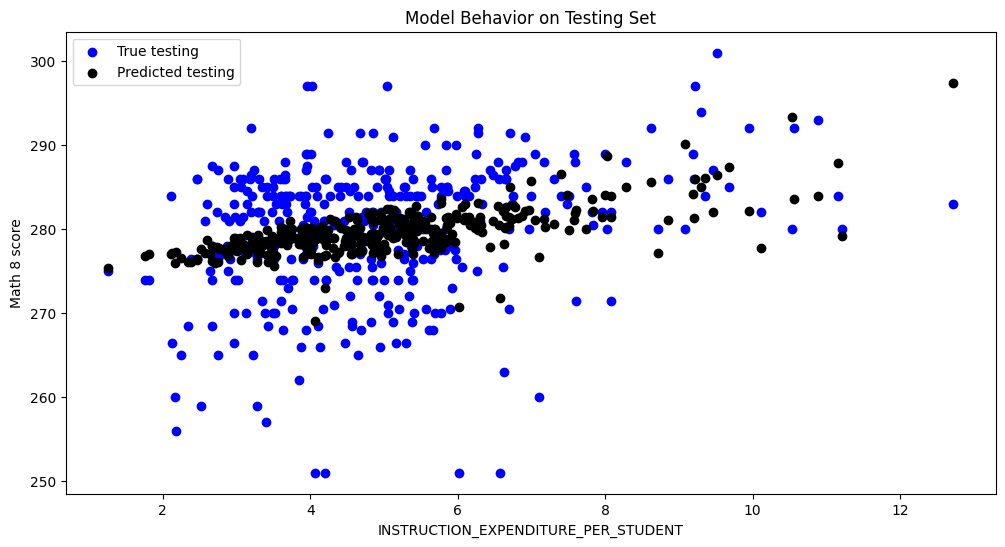

In [245]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

It seems like instruction and support services expenditure per student is loosely linearly related to the 8th grade math score, but only slightly, with an R^2 value of ~0.15. I think that the points in the dataset where expenditure increases but scores don't may have caused an issue. I also wonder if filling NaN values with the median was the right idea, since it seemed to increase the number of outliers by creating a bunch of score values in a horizontal line. In the future, we could remove outliers using an unsupervised outlier detection algorithm (like isolation forest). As it stands, predicting student performance with expenditures per student is not recommended.